# Springboard Capstone Project 2
## Tuning dropout rate of first fully-connected layer
___

Dropout is a powerful regularization technique used to boost validation set performance. In this technique, a proportion of the nodes in a given layer are randomly selected to be dropped for each training batch. The remaining nodes are then trained on that batch. This forces the model to store a more robust, redundant understanding of the dataset across its nodes. Dropout thus allows for a larger model capacity without overfitting the training data.

Dropout was tested for each FC layer individually. FC layer width was increased in proportion to the degree of dropout. For example, at a dropout of 0.2, width was increased to 1250 so that 1000 nodes were active after 20% were randomly dropped. Dropout on the first layer was tested first, as earlier dropout usually has a greater impact on the model. 

In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
import tensorflow as tf
import keras.backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from importlib import reload

# custom module for capstone 2
import cap2tools as c2t
reload(c2t)

<module 'cap2tools' from 'C:\\Users\\Nils\\Documents\\GitHub\\Springboard-Capstone-2-local-yelp\\cap2tools.py'>

In [3]:
# configure GPU memory usage by tensorflow
config = K.tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.90
K.tensorflow_backend.set_session(K.tf.Session(config=config))

In [4]:
# define paths to image directories
train_path = 'downsampled/train'
valid_path = 'downsampled/val'

# create data generators
train_batches, valid_batches = c2t.build_datagens(train_path, valid_path, augment=True)

Found 5480 images belonging to 5 classes.
Found 525 images belonging to 5 classes.


In [8]:
# define conditions for model comparison
lr = 0.0001
replicates = 3
n_epochs = 8

width = 1000
d1s = np.array([0, 0.1, 0.2, 0.3, 0.4])
width1s = width // (1-d1s)
width1s = width1s.astype(int)

In [ ]:
# train different model conditions
model_paths = dict()
histories = dict()

for width1, d1 in zip(width1s, d1s):
    condition = 'dropout1_{}'.format(str(d1).replace('.', '-'))
    widths = (width1, width)
    histories[d1] = c2t.run_in_replicate(widths, condition, train_batches, valid_batches, 
                                         replicates=replicates, n_epochs=n_epochs, new_weights=False, 
                                         trainable=True, learning_rate=lr, dropout1=d1)
    
    # add key-value pairs to model_paths
    for i in range(1, replicates+1):
        key = condition + ' - ' + str(i)
        value = 'models/vgg16_{}_{}.h5'.format(condition, str(i))
        model_paths[key] = value

2018-09-19 16:26:24 - Started training models/vgg16_dropout1_0-0_1
2018-09-19 16:47:20 - Started training models/vgg16_dropout1_0-0_2
2018-09-19 17:08:20 - Started training models/vgg16_dropout1_0-0_3


In [ ]:
# save history as json
pd.DataFrame(histories).transpose().to_json('VGG16_dropout1_comparison_history.json')

In [10]:
model_paths = dict()

for width1, d1 in zip(width1s, d1s):
    condition = 'dropout1_{}'.format(str(d1).replace('.', '-'))
   
    # add key-value pairs to model_paths
    for i in range(1, replicates+1):
        key = condition + ' - ' + str(i)
        value = 'models/vgg16_{}_{}.h5'.format(condition, str(i))
        model_paths[key] = value

# evaluate trained models on validation dataset
model_metrics = c2t.eval_models(model_paths, valid_path)

Building image generator...
Found 525 images belonging to 5 classes.
Loading models/vgg16_dropout1_0-0_1.h5
Evaluating models/vgg16_dropout1_0-0_1.h5
Loading models/vgg16_dropout1_0-0_2.h5
Evaluating models/vgg16_dropout1_0-0_2.h5
Loading models/vgg16_dropout1_0-0_3.h5
Evaluating models/vgg16_dropout1_0-0_3.h5
Loading models/vgg16_dropout1_0-1_1.h5
Evaluating models/vgg16_dropout1_0-1_1.h5
Loading models/vgg16_dropout1_0-1_2.h5
Evaluating models/vgg16_dropout1_0-1_2.h5
Loading models/vgg16_dropout1_0-1_3.h5
Evaluating models/vgg16_dropout1_0-1_3.h5
Loading models/vgg16_dropout1_0-2_1.h5
Evaluating models/vgg16_dropout1_0-2_1.h5
Loading models/vgg16_dropout1_0-2_2.h5
Evaluating models/vgg16_dropout1_0-2_2.h5
Loading models/vgg16_dropout1_0-2_3.h5
Evaluating models/vgg16_dropout1_0-2_3.h5
Loading models/vgg16_dropout1_0-3_1.h5
Evaluating models/vgg16_dropout1_0-3_1.h5
Loading models/vgg16_dropout1_0-3_2.h5
Evaluating models/vgg16_dropout1_0-3_2.h5
Loading models/vgg16_dropout1_0-3_3.h5
E

In [24]:
# create table of evaluation results
table = c2t.eval_table(model_metrics, 'Dropout1')
table

acc          loss          mpcr       
            max   mean    min   mean    max   mean
Dropout1                                          
0.0       0.916  0.887  0.253  0.302  0.916  0.887
0.1       0.897  0.885  0.277  0.320  0.897  0.885
0.2       0.886  0.868  0.306  0.349  0.886  0.868
0.3       0.861  0.848  0.340  0.382  0.861  0.848
0.4       0.882  0.863  0.345  0.372  0.882  0.863

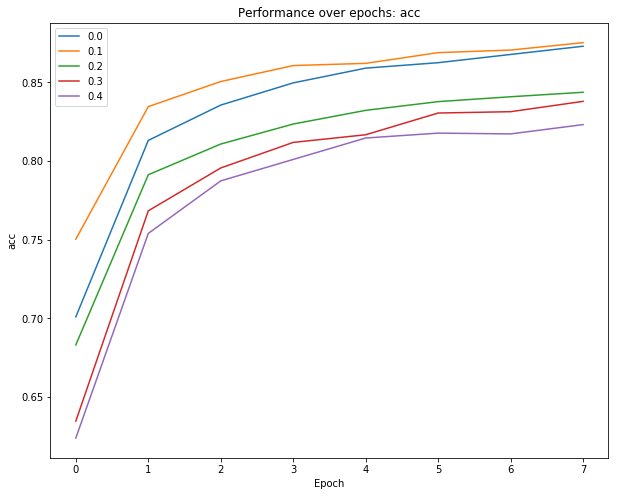

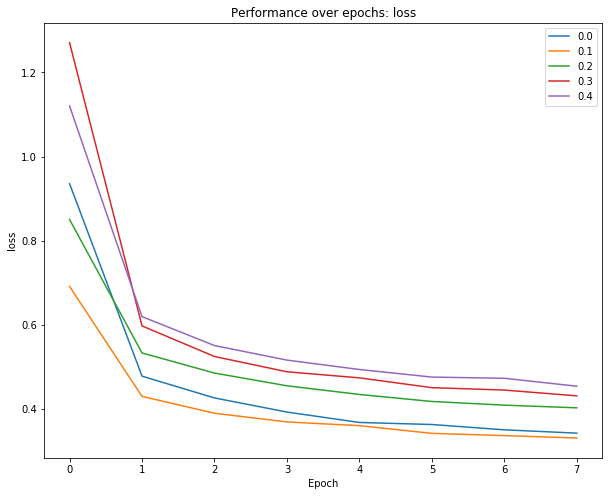

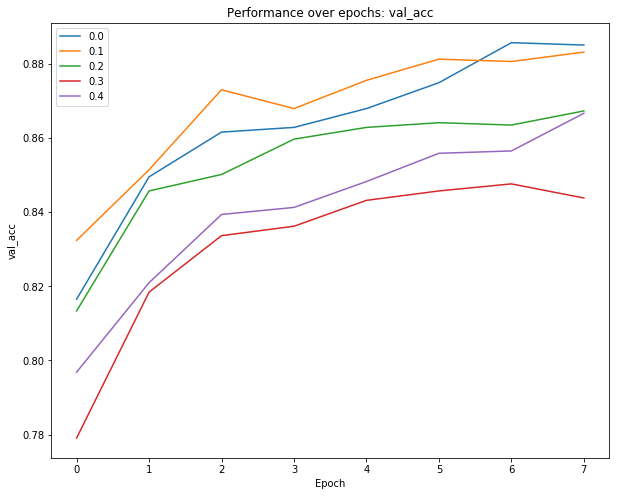

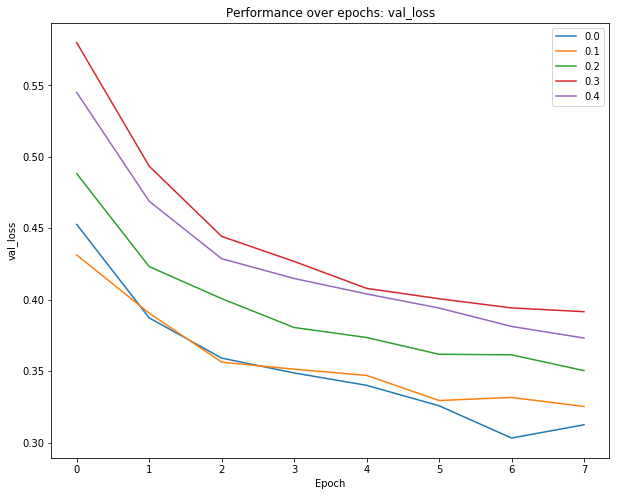

In [6]:
hist_df = pd.read_json('VGG16_dropout1_comparison_history.json', convert_axes=False)

# plot model comparison
c2t.plot_metric('acc', hist_df)
c2t.plot_metric('loss', hist_df)
c2t.plot_metric('val_acc', hist_df)
c2t.plot_metric('val_loss', hist_df)